In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Download Stock Data
ticker = 'SPY'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
# Calculate common technical indicators from the smoothed data
data['RSI'] = 100 - (100 / (1 + data['Smoothed_Close'].pct_change().rolling(window=14).mean()))
data['Stochastic'] = (data['Smoothed_Close'] - data['Low'].rolling(window=14).min()) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
data['Williams_%R'] = (data['High'].rolling(window=14).max() - data['Smoothed_Close']) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * -100
data['MACD'] = data['Smoothed_Close'].ewm(span=12, adjust=False).mean() - data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).cumsum()

# Handle NaN values
data.dropna(inplace=True)

# Step 4: Define Target Variable
# Calculate target based on price change after 'd' days
d = 15  # Prediction period
data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])

# Convert Target to -1 or 1
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)

# Step 5: Prepare Features and Labels
features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV']
X = data[features]
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


[*********************100%***********************]  1 of 1 completed

Accuracy: 0.89
              precision    recall  f1-score   support

          -1       0.85      0.76      0.80        46
           1       0.90      0.94      0.92       103

    accuracy                           0.89       149
   macro avg       0.88      0.85      0.86       149
weighted avg       0.88      0.89      0.88       149



In [70]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Download Stock Data
ticker = 'SPY'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
# Calculate common technical indicators from the smoothed data
data['RSI'] = 100 - (100 / (1 + data['Smoothed_Close'].pct_change().rolling(window=14).mean()))
data['Stochastic'] = (data['Smoothed_Close'] - data['Low'].rolling(window=14).min()) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
data['Williams_%R'] = (data['High'].rolling(window=14).max() - data['Smoothed_Close']) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * -100
data['MACD'] = data['Smoothed_Close'].ewm(span=12, adjust=False).mean() - data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).cumsum()

# Handle NaN values
data.dropna(inplace=True)

# Step 4: Define Target Variable

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import recall_score

def train_test_days(data, d):
    # Create target labels based on future price changes
    data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])
    data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)

    # Define features for training
    features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV']
    X = data[features]
    y = data['Target']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    return accuracy, precision, f1, recall


# Store results for multiple metrics
result = []
for i in range(1, 30):
    accuracy, precision, f1, recall = train_test_days(data, i)
    result.append({
        'Days': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1': f1,
        'Recall': recall
    })

# Create DataFrame to store results
df = pd.DataFrame(result)

# Display the DataFrame
df.head()



[*********************100%***********************]  1 of 1 completed


,Days,Accuracy,Precision,F1,Recall
0,1,0.463087,0.462138,0.461900,0.462329
1,2,0.590604,0.564783,0.565224,0.567057
2,3,0.617450,0.601557,0.601286,0.608090
3,4,0.704698,0.677441,0.680507,0.686174
4,5,0.711409,0.683564,0.686500,0.691277


[*********************100%***********************]  1 of 1 completed


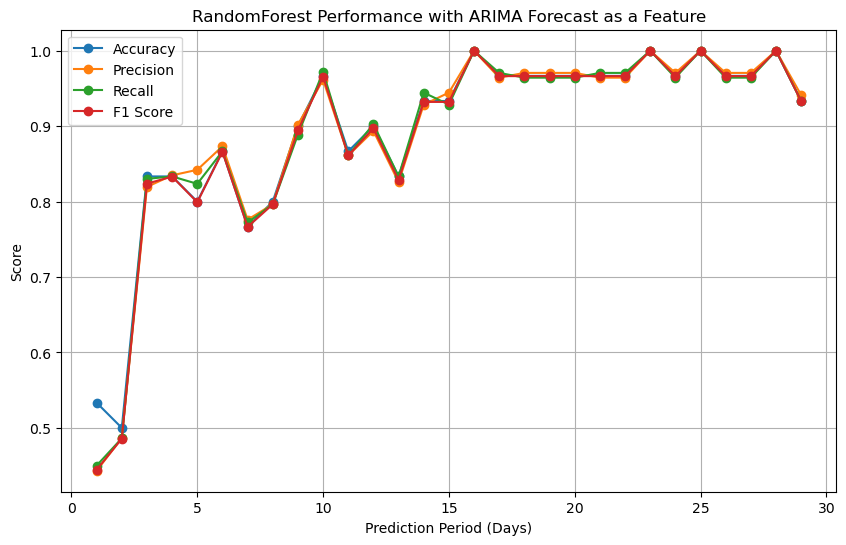

In [78]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Download Stock Data
ticker = 'SPY'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
# Calculate common technical indicators from the smoothed data
data['RSI'] = 100 - (100 / (1 + data['Smoothed_Close'].pct_change().rolling(window=14).mean()))
data['Stochastic'] = (data['Smoothed_Close'] - data['Low'].rolling(window=14).min()) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
data['Williams_%R'] = (data['High'].rolling(window=14).max() - data['Smoothed_Close']) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * -100
data['MACD'] = data['Smoothed_Close'].ewm(span=12, adjust=False).mean() - data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).cumsum()

# Handle NaN values
data.dropna(inplace=True)

# Step 4: ARIMA Model for Time Series Forecast
def arima_forecast_feature(data):
    # Train ARIMA model on 'Close' prices
    train_size = int(len(data) * 0.8)
    train, test = data['Close'][:train_size], data['Close'][train_size:]

    # Fit ARIMA model (parameters can be tuned)
    model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) parameters
    model_fit = model.fit()

    # Forecast the test set and extend predictions to the original dataset size
    forecast = model_fit.forecast(steps=len(data) - train_size)
    arima_pred = np.concatenate([train[-len(test):], forecast])

    # Create ARIMA forecast as a new feature (shifted for alignment with technical indicators)
    data['ARIMA_Pred'] = np.concatenate([np.full(train_size, np.nan), forecast])
    
    return data

# Step 5: Integrate ARIMA Forecast into Data
data = arima_forecast_feature(data)

# Step 6: Define Target Variable and Add ARIMA to Features
def train_test_days(data, d):
    # Create target labels based on future price changes
    data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])
    data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)

    # Define features for training, including ARIMA forecast
    features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV', 'ARIMA_Pred']
    X = data[features].dropna()  # Drop rows with NaNs caused by ARIMA forecast lag
    y = data.loc[X.index, 'Target']  # Align target with available features

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    return accuracy, precision, f1, recall

# Step 7: Store results for multiple metrics (RandomForest)
result = []
for i in range(1, 30):
    accuracy, precision, f1, recall = train_test_days(data, i)
    result.append({
        'Days': i,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1': f1,
        'Recall': recall
    })

# Create DataFrame to store results
df_rf = pd.DataFrame(result)

# Step 8: Visualize Results
plt.figure(figsize=(10, 6))
plt.plot(df_rf['Days'], df_rf['Accuracy'], label='Accuracy', marker='o')
plt.plot(df_rf['Days'], df_rf['Precision'], label='Precision', marker='o')
plt.plot(df_rf['Days'], df_rf['Recall'], label='Recall', marker='o')
plt.plot(df_rf['Days'], df_rf['F1'], label='F1 Score', marker='o')
plt.title('RandomForest Performance with ARIMA Forecast as a Feature')
plt.xlabel('Prediction Period (Days)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


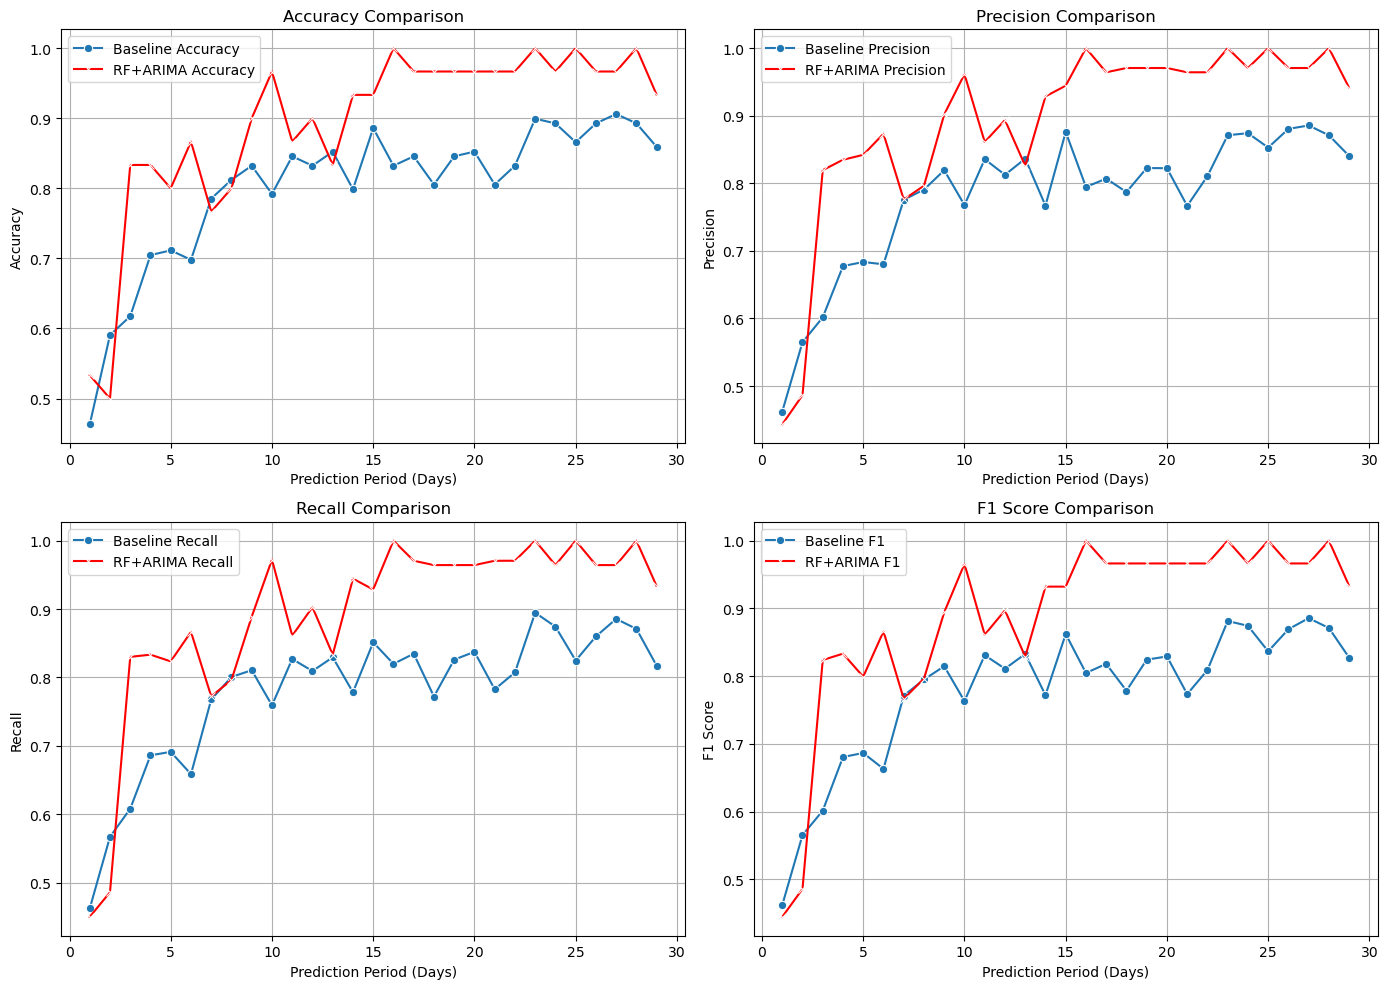

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the baseline model's results and df_rf is the RandomForest with ARIMA results

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy comparison
sns.lineplot(data=df, x='Days', y='Accuracy', ax=axs[0, 0], label='Baseline Accuracy', marker='o')
sns.lineplot(data=df_rf, x='Days', y='Accuracy', ax=axs[0, 0], label='RF+ARIMA Accuracy', marker='x', color='red')
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].set_xlabel('Prediction Period (Days)')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

# Plot Precision comparison
sns.lineplot(data=df, x='Days', y='Precision', ax=axs[0, 1], label='Baseline Precision', marker='o')
sns.lineplot(data=df_rf, x='Days', y='Precision', ax=axs[0, 1], label='RF+ARIMA Precision', marker='x', color='red')
axs[0, 1].set_title('Precision Comparison')
axs[0, 1].set_xlabel('Prediction Period (Days)')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

# Plot Recall comparison
sns.lineplot(data=df, x='Days', y='Recall', ax=axs[1, 0], label='Baseline Recall', marker='o')
sns.lineplot(data=df_rf, x='Days', y='Recall', ax=axs[1, 0], label='RF+ARIMA Recall', marker='x', color='red')
axs[1, 0].set_title('Recall Comparison')
axs[1, 0].set_xlabel('Prediction Period (Days)')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# Plot F1 Score comparison
sns.lineplot(data=df, x='Days', y='F1', ax=axs[1, 1], label='Baseline F1', marker='o')
sns.lineplot(data=df_rf, x='Days', y='F1', ax=axs[1, 1], label='RF+ARIMA F1', marker='x', color='red')
axs[1, 1].set_title('F1 Score Comparison')
axs[1, 1].set_xlabel('Prediction Period (Days)')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



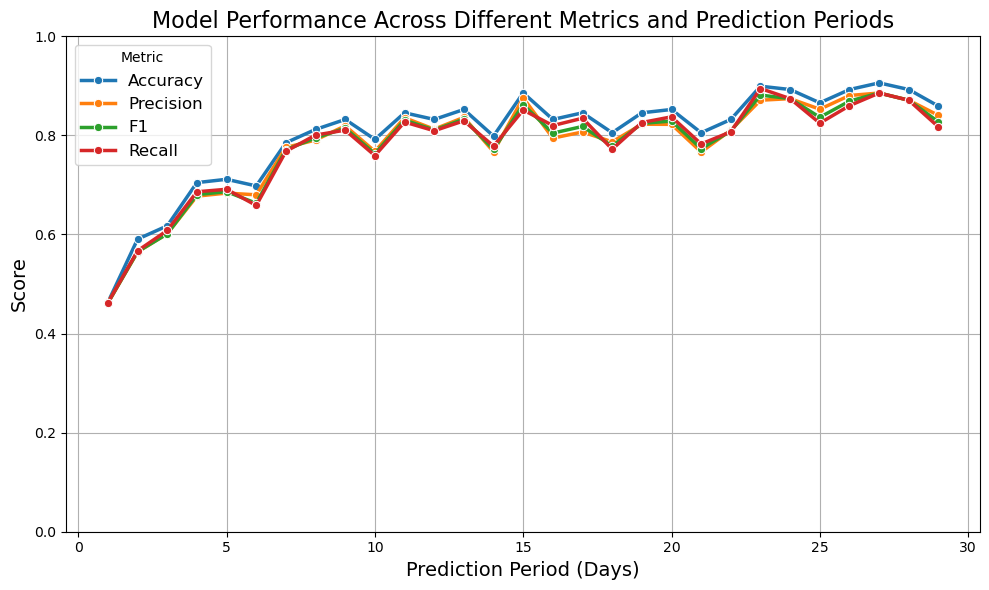

In [71]:
# Melt the DataFrame to plot multiple metrics in one chart
melted_df = df.melt(id_vars='Days', value_vars=['Accuracy', 'Precision', 'F1', 'Recall'], 
                    var_name='Metric', value_name='Value')

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the metrics over prediction periods
sns.lineplot(
    data=melted_df,
    x='Days',
    y='Value',
    hue='Metric',
    marker='o',
    linewidth=2.5
)

# Add labels and title
plt.title('Model Performance Across Different Metrics and Prediction Periods', fontsize=16)
plt.xlabel('Prediction Period (Days)', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='Metric', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed

Data downloaded successfully.

Performing feature engineering...
Feature engineering completed.

Evaluating Prediction Period: 1 days


Model 1 (RF without ARIMA) - Accuracy: 0.46, Precision: 0.45, Recall: 0.60, F1-Score: 0.51
Model 2 (RF with ARIMA)    - Accuracy: 0.52, Precision: 0.49, Recall: 0.71, F1-Score: 0.58
Model 3 (Simple ARIMA)     - Accuracy: 0.56, Precision: 0.55, Recall: 0.40, F1-Score: 0.46

Evaluating Prediction Period: 3 days
Model 1 (RF without ARIMA) - Accuracy: 0.55, Precision: 0.52, Recall: 0.71, F1-Score: 0.60
Model 2 (RF with ARIMA)    - Accuracy: 0.56, Precision: 0.53, Recall: 0.73, F1-Score: 0.61
Model 3 (Simple ARIMA)     - Accuracy: 0.55, Precision: 0.56, Recall: 0.26, F1-Score: 0.35

Evaluating Prediction Period: 5 days
Model 1 (RF without ARIMA) - Accuracy: 0.50, Precision: 0.48, Recall: 0.62, F1-Score: 0.54
Model 2 (RF with ARIMA)    - Accuracy: 0.50, Precision: 0.48, Recall: 0.66, F1-Score: 0.56
Model 3 (Simple ARIMA)     - Accuracy: 0.61, Precision: 0.68, Recall: 0.38, F1-Score: 0.49

Evaluating Prediction Period: 7 days
Model 1 (RF without ARIMA) - Accuracy: 0.49, Precision: 0.48, Recal

,Prediction_Period,Accuracy_Model1,Precision_Model1,Recall_Model1,F1_Score_Model1,Accuracy_Model2,Precision_Model2,Recall_Model2,F1_Score_Model2,Accuracy_Model3,Precision_Model3,Recall_Model3,F1_Score_Model3
0,1,0.463087,0.446809,0.600000,0.512195,0.516779,0.490196,0.714286,0.581395,0.563758,0.549020,0.400000,0.462810
1,3,0.554054,0.520833,0.714286,0.602410,0.560811,0.525773,0.728571,0.610778,0.554054,0.562500,0.257143,0.352941
2,5,0.500000,0.483516,0.619718,0.543210,0.500000,0.484536,0.661972,0.559524,0.614865,0.675000,0.380282,0.486486
3,7,0.486486,0.480392,0.680556,0.563218,0.479730,0.477876,0.750000,0.583784,0.587838,0.789474,0.208333,0.329670
4,10,0.564626,0.533333,0.685714,0.600000,0.598639,0.557895,0.757143,0.642424,0.659864,0.621951,0.728571,0.671053
5,14,0.541096,0.485981,0.812500,0.608187,0.527397,0.480000,0.937500,0.634921,0.691781,0.702128,0.515625,0.594595
6,21,0.434483,0.389831,0.821429,0.528736,0.600000,0.483333,0.517857,0.500000,0.482759,0.427481,1.000000,0.598930


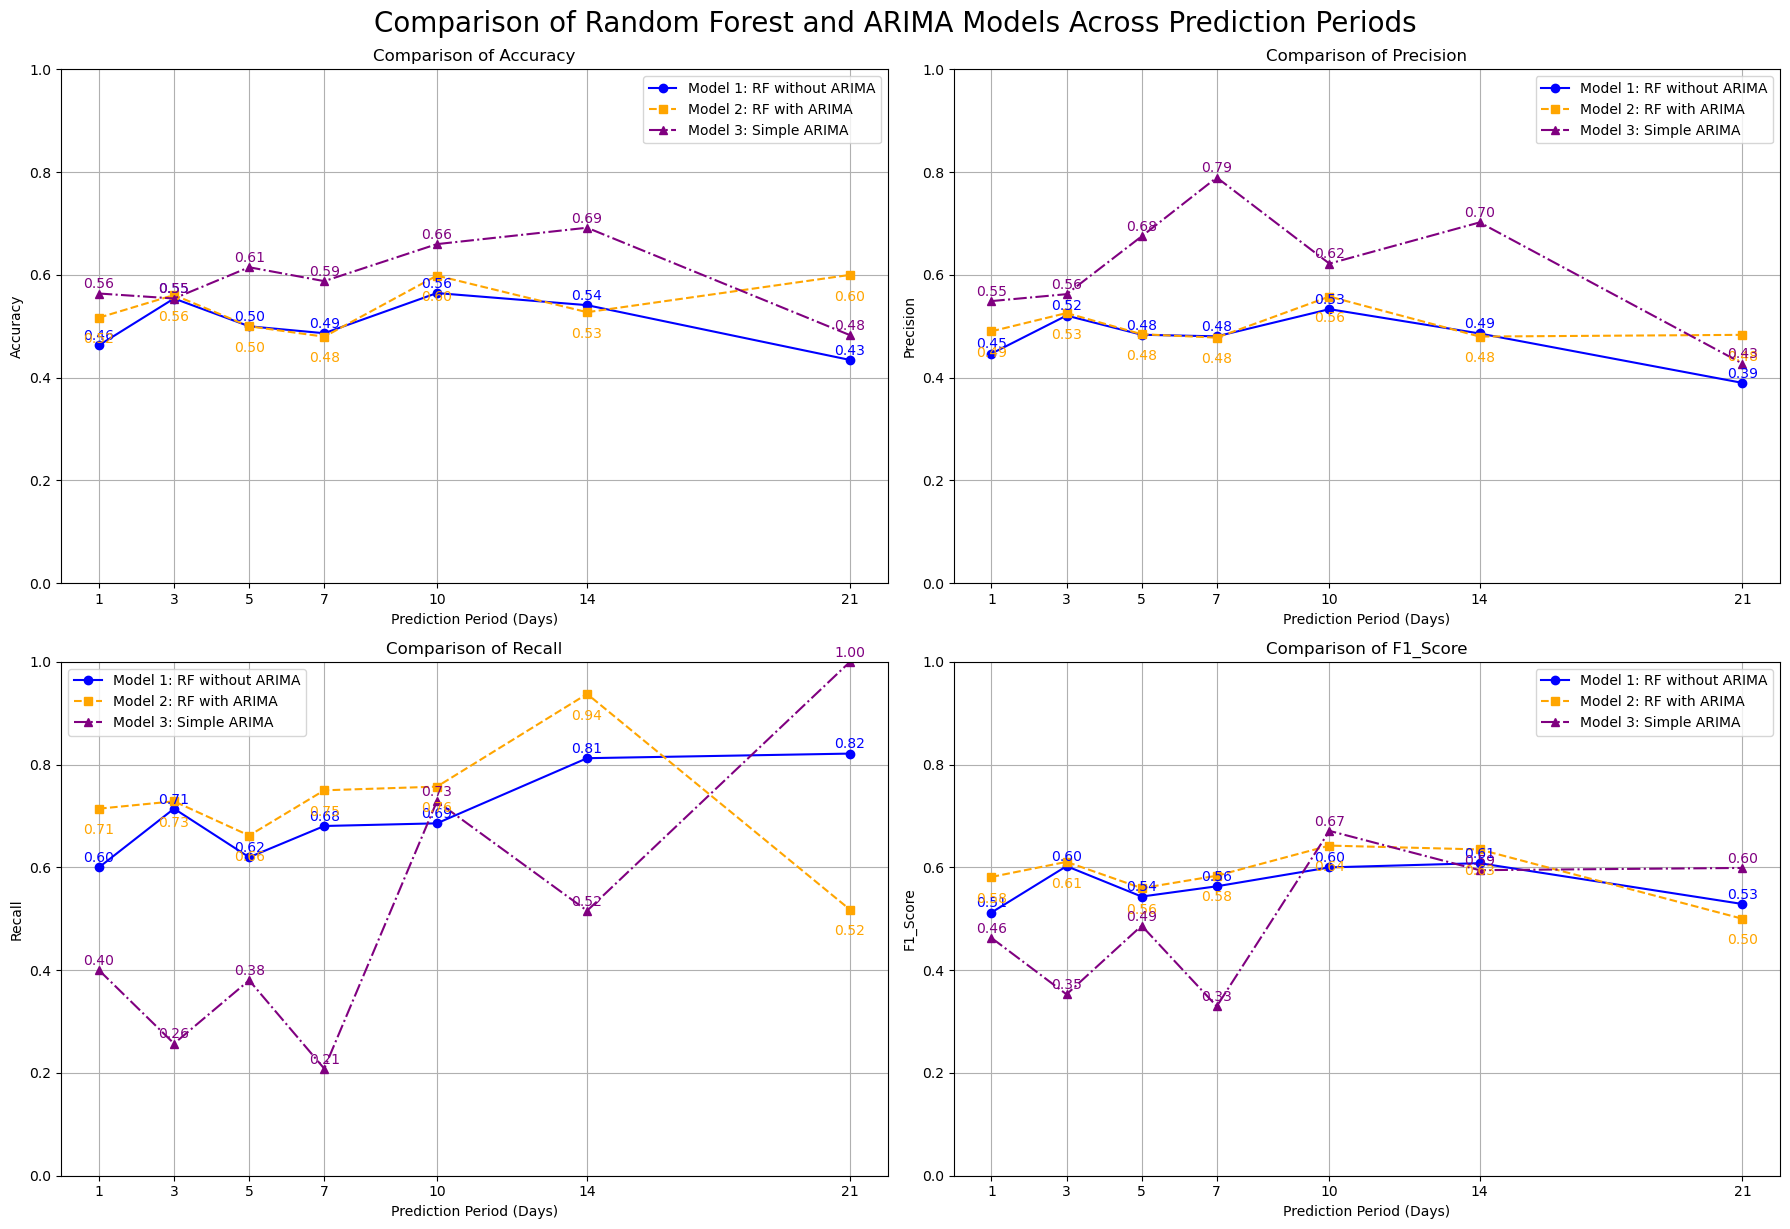

In [62]:
# Import Necessary Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Suppress warnings from statsmodels for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Define Ticker Symbol
ticker = 'AAPL'  # You can change this to 'SPY' or any other ticker as needed

# Step 1: Download Stock Data
print(f"Downloading data for {ticker}...")
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print("Data downloaded successfully.\n")

# Step 2: Exponential Smoothing for Close Prices
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
print("Performing feature engineering...")
# Relative Strength Index (RSI)
delta = data['Smoothed_Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Stochastic Oscillator
lowest_low = data['Low'].rolling(window=14).min()
highest_high = data['High'].rolling(window=14).max()
data['Stochastic'] = ((data['Smoothed_Close'] - lowest_low) / (highest_high - lowest_low)) * 100

# Williams %R
data['Williams_%R'] = ((highest_high - data['Smoothed_Close']) / (highest_high - lowest_low)) * -100

# Moving Average Convergence Divergence (MACD)
ema12 = data['Smoothed_Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26

# Rate of Change (ROC)
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100

# On-Balance Volume (OBV)
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).fillna(0).cumsum()

# Handle NaN values resulting from feature calculations
data.dropna(inplace=True)
print("Feature engineering completed.\n")

# Step 4: Define Prediction Periods
prediction_periods = [1, 3, 5, 7, 10, 14, 21]  # Days ahead to predict

# Initialize dictionaries to store performance metrics for all models
metrics_model1 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

metrics_model2 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

metrics_model3 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

# Define Base Features (common to both Random Forest models)
base_features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV']

# Iterate over each prediction period
for d in prediction_periods:
    print(f"Evaluating Prediction Period: {d} days")
    
    # Step 5: Define Target Variable based on 'd' days ahead
    data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])
    
    # Convert Target to -1 or 1
    data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)
    
    # Drop the last 'd' rows where target is NaN after shifting
    data_d = data[:-d].copy()
    
    # Step 6: Prepare Features and Labels
    X = data_d[base_features].copy()
    y = data_d['Target'].copy()
    
    # Step 7: Split data into train and test sets (time-series aware split)
    split_index = int(0.8 * len(X))  # 80% for training
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    
    # ----------------------------- Model 1: Random Forest without ARIMA -----------------------------
    # Initialize and train Random Forest Classifier
    rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model1.fit(X_train, y_train)
    
    # Make Predictions
    y_pred1 = rf_model1.predict(X_test)
    
    # Evaluate Model 1
    accuracy1 = accuracy_score(y_test, y_pred1)
    report1 = classification_report(y_test, y_pred1, output_dict=True)
    precision1 = report1['1']['precision'] if '1' in report1 else 0
    recall1 = report1['1']['recall'] if '1' in report1 else 0
    f1_1 = report1['1']['f1-score'] if '1' in report1 else 0
    
    # Store Metrics for Model 1
    metrics_model1['Prediction_Period'].append(d)
    metrics_model1['Accuracy'].append(accuracy1)
    metrics_model1['Precision'].append(precision1)
    metrics_model1['Recall'].append(recall1)
    metrics_model1['F1_Score'].append(f1_1)
    
    # ----------------------------- Model 2: Random Forest with ARIMA -----------------------------
    # Initialize ARIMA model on training data's Smoothed_Close
    arima_order = (5, 1, 0)  # You can experiment with different orders
    arima_model = ARIMA(data_d['Smoothed_Close'].iloc[:split_index], order=arima_order)
    arima_fit = arima_model.fit()
    
    # Forecast ARIMA predictions for the test set
    arima_pred = arima_fit.forecast(steps=len(X_test))
    
    # Add ARIMA_Prediction as a new feature
    X_train_arima = X_train.copy()
    X_test_arima = X_test.copy()
    X_train_arima['ARIMA_Prediction'] = arima_fit.predict(start=0, end=len(X_train)-1)
    X_test_arima['ARIMA_Prediction'] = arima_pred.values
    
    # Handle any potential NaN values after ARIMA prediction
    X_train_arima['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
    X_test_arima['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
    
    # Define Final Features for Model 2
    final_features = base_features + ['ARIMA_Prediction']
    
    # Ensure no NaN values
    if X_train_arima[final_features].isnull().sum().sum() > 0 or X_test_arima[final_features].isnull().sum().sum() > 0:
        print("NaN values detected in Model 2 features after ARIMA prediction. Skipping this prediction period.\n")
    else:
        # Initialize and train Random Forest Classifier for Model 2
        rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model2.fit(X_train_arima[final_features], y_train)
        
        # Make Predictions for Model 2
        y_pred2 = rf_model2.predict(X_test_arima[final_features])
        
        # Evaluate Model 2
        accuracy2 = accuracy_score(y_test, y_pred2)
        report2 = classification_report(y_test, y_pred2, output_dict=True)
        precision2 = report2['1']['precision'] if '1' in report2 else 0
        recall2 = report2['1']['recall'] if '1' in report2 else 0
        f1_2 = report2['1']['f1-score'] if '1' in report2 else 0
        
        # Store Metrics for Model 2
        metrics_model2['Prediction_Period'].append(d)
        metrics_model2['Accuracy'].append(accuracy2)
        metrics_model2['Precision'].append(precision2)
        metrics_model2['Recall'].append(recall2)
        metrics_model2['F1_Score'].append(f1_2)
    
    # ----------------------------- Model 3: Simple ARIMA-based Classifier -----------------------------
    # Train ARIMA on training data
    arima_model_m3 = ARIMA(data_d['Smoothed_Close'].iloc[:split_index], order=arima_order)
    arima_fit_m3 = arima_model_m3.fit()
    
    # Forecast 'd' days ahead for each observation in the test set
    # This creates a one-step forecast for each day in the test set
    # To simulate a simple ARIMA classifier, we'll forecast 'd' days ahead from each point
    # and compare it with the actual 'd' days ahead close price
    # This approach may be computationally intensive for large datasets
    
    # However, since we've already shifted the target by 'd' days, we can forecast 'd' days ahead once
    # and use it as a global forecast
    # Alternatively, to perform rolling forecasts, which is more accurate but complex
    
    # For simplicity, we'll use the forecasted values as a bulk forecast
    arima_pred_m3 = arima_fit_m3.forecast(steps=len(X_test))
    
    # Compare forecasted Close with actual Close to define predictions
    y_pred3 = np.where(arima_pred_m3 > data_d['Close'].iloc[split_index:].values, 1, -1)
    
    # Evaluate Model 3
    accuracy3 = accuracy_score(y_test, y_pred3)
    report3 = classification_report(y_test, y_pred3, output_dict=True)
    precision3 = report3['1']['precision'] if '1' in report3 else 0
    recall3 = report3['1']['recall'] if '1' in report3 else 0
    f1_3 = report3['1']['f1-score'] if '1' in report3 else 0
    
    # Store Metrics for Model 3
    metrics_model3['Prediction_Period'].append(d)
    metrics_model3['Accuracy'].append(accuracy3)
    metrics_model3['Precision'].append(precision3)
    metrics_model3['Recall'].append(recall3)
    metrics_model3['F1_Score'].append(f1_3)
    
    # Print Metrics for All Models
    print(f"Model 1 (RF without ARIMA) - Accuracy: {accuracy1:.2f}, Precision: {precision1:.2f}, Recall: {recall1:.2f}, F1-Score: {f1_1:.2f}")
    if d in prediction_periods:
        if d in metrics_model2['Prediction_Period']:
            print(f"Model 2 (RF with ARIMA)    - Accuracy: {accuracy2:.2f}, Precision: {precision2:.2f}, Recall: {recall2:.2f}, F1-Score: {f1_2:.2f}")
    print(f"Model 3 (Simple ARIMA)     - Accuracy: {accuracy3:.2f}, Precision: {precision3:.2f}, Recall: {recall3:.2f}, F1-Score: {f1_3:.2f}\n")

# Step 8: Create DataFrames from Metrics
df_metrics_model1 = pd.DataFrame(metrics_model1)
df_metrics_model2 = pd.DataFrame(metrics_model2)
df_metrics_model3 = pd.DataFrame(metrics_model3)

# Merge the three DataFrames on Prediction_Period
df_comparison = df_metrics_model1.merge(df_metrics_model2, on='Prediction_Period', how='left', suffixes=('_Model1', '_Model2'))
df_comparison = df_comparison.merge(df_metrics_model3, on='Prediction_Period', how='left', suffixes=('', '_Model3'))

# Rename columns for clarity
df_comparison.rename(columns={
    'Accuracy': 'Accuracy_Model3',
    'Precision': 'Precision_Model3',
    'Recall': 'Recall_Model3',
    'F1_Score': 'F1_Score_Model3'
}, inplace=True)

print("Comparison of Model Performance Across Prediction Periods:")
display(df_comparison)

# Step 9: Visualization of Model Performance Comparison
plt.figure(figsize=(18, 12))

# Define Metrics to Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
colors = {'Accuracy': 'b', 'Precision': 'g', 'Recall': 'r', 'F1_Score': 'm'}

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    # Plot for Model 1
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model1'], 
             marker='o', linestyle='-', color='b', label='Model 1: RF without ARIMA')
    # Plot for Model 2
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model2'], 
             marker='s', linestyle='--', color='orange', label='Model 2: RF with ARIMA')
    # Plot for Model 3
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model3'], 
             marker='^', linestyle='-.', color='purple', label='Model 3: Simple ARIMA')
    
    plt.title(f'Comparison of {metric}')
    plt.xlabel('Prediction Period (Days)')
    plt.ylabel(metric)
    plt.xticks(prediction_periods)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    
    # Annotate each point with its value
    for j, d in enumerate(df_comparison['Prediction_Period']):
        # Model 1
        plt.text(d, df_comparison[f'{metric}_Model1'][j] + 0.01, 
                 f"{df_comparison[f'{metric}_Model1'][j]:.2f}", ha='center', color='b')
        # Model 2
        if not pd.isna(df_comparison[f'{metric}_Model2'][j]):
            plt.text(d, df_comparison[f'{metric}_Model2'][j] - 0.05, 
                     f"{df_comparison[f'{metric}_Model2'][j]:.2f}", ha='center', color='orange')
        # Model 3
        plt.text(d, df_comparison[f'{metric}_Model3'][j] + 0.01, 
                 f"{df_comparison[f'{metric}_Model3'][j]:.2f}", ha='center', color='purple')

plt.tight_layout()
plt.suptitle('Comparison of Random Forest and ARIMA Models Across Prediction Periods', fontsize=20, y=1.02)
plt.show()


[*********************100%***********************]  1 of 1 completed

Data downloaded successfully.

Performing feature engineering...
Feature engineering completed.

Evaluating Prediction Period: 1 days


Model 1 (RF without ARIMA) - Accuracy: 0.46, Precision: 0.45, Recall: 0.60, F1-Score: 0.51
Model 2 (RF with ARIMA)    - Accuracy: 0.52, Precision: 0.49, Recall: 0.71, F1-Score: 0.58

Evaluating Prediction Period: 3 days
Model 1 (RF without ARIMA) - Accuracy: 0.55, Precision: 0.52, Recall: 0.71, F1-Score: 0.60
Model 2 (RF with ARIMA)    - Accuracy: 0.56, Precision: 0.53, Recall: 0.73, F1-Score: 0.61

Evaluating Prediction Period: 5 days
Model 1 (RF without ARIMA) - Accuracy: 0.50, Precision: 0.48, Recall: 0.62, F1-Score: 0.54
Model 2 (RF with ARIMA)    - Accuracy: 0.50, Precision: 0.48, Recall: 0.66, F1-Score: 0.56

Evaluating Prediction Period: 7 days
Model 1 (RF without ARIMA) - Accuracy: 0.49, Precision: 0.48, Recall: 0.68, F1-Score: 0.56
Model 2 (RF with ARIMA)    - Accuracy: 0.48, Precision: 0.48, Recall: 0.75, F1-Score: 0.58

Evaluating Prediction Period: 10 days
Model 1 (RF without ARIMA) - Accuracy: 0.56, Precision: 0.53, Recall: 0.69, F1-Score: 0.60
Model 2 (RF with ARIMA)    -

,Prediction_Period,Accuracy_Model1,Precision_Model1,Recall_Model1,F1_Score_Model1,Accuracy_Model2,Precision_Model2,Recall_Model2,F1_Score_Model2
0,1,0.463087,0.446809,0.600000,0.512195,0.516779,0.490196,0.714286,0.581395
1,3,0.554054,0.520833,0.714286,0.602410,0.560811,0.525773,0.728571,0.610778
2,5,0.500000,0.483516,0.619718,0.543210,0.500000,0.484536,0.661972,0.559524
3,7,0.486486,0.480392,0.680556,0.563218,0.479730,0.477876,0.750000,0.583784
4,10,0.564626,0.533333,0.685714,0.600000,0.598639,0.557895,0.757143,0.642424
5,14,0.541096,0.485981,0.812500,0.608187,0.527397,0.480000,0.937500,0.634921
6,21,0.434483,0.389831,0.821429,0.528736,0.600000,0.483333,0.517857,0.500000


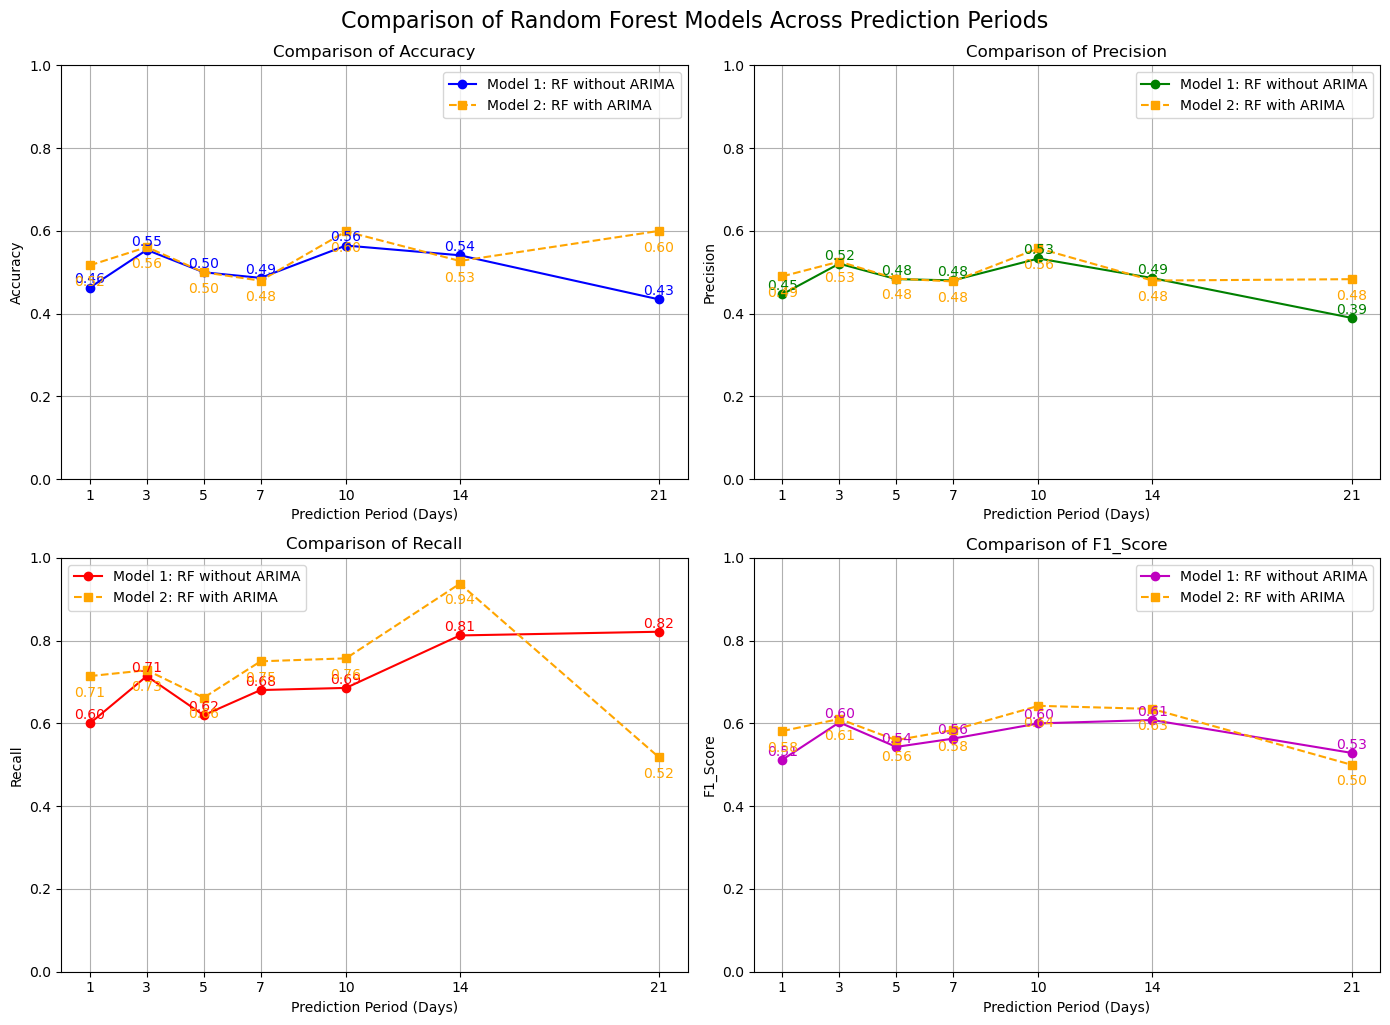

In [51]:
# Import Necessary Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Step 1: Download Stock Data
ticker = 'AAPL'  # Apple Inc.
start_date = '2020-01-01'
end_date = '2023-01-01'

print("Downloading data...")
data = yf.download(ticker, start=start_date, end=end_date)
print("Data downloaded successfully.\n")

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
print("Performing feature engineering...")
# RSI Calculation
delta = data['Smoothed_Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Stochastic Oscillator
lowest_low = data['Low'].rolling(window=14).min()
highest_high = data['High'].rolling(window=14).max()
data['Stochastic'] = ((data['Smoothed_Close'] - lowest_low) / (highest_high - lowest_low)) * 100

# Williams %R
data['Williams_%R'] = ((highest_high - data['Smoothed_Close']) / (highest_high - lowest_low)) * -100

# MACD
ema12 = data['Smoothed_Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26

# Rate of Change (ROC)
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100

# On-Balance Volume (OBV)
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).fillna(0).cumsum()

# Handle NaN values
data.dropna(inplace=True)
print("Feature engineering completed.\n")

# Step 4: Define Prediction Periods
prediction_periods = [1, 3, 5, 7, 10, 14, 21]  # Days ahead to predict

# Initialize dictionaries to store performance metrics for both models
metrics_model1 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

metrics_model2 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

# Define Base Features (common to both models)
base_features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV']

# Iterate over each prediction period
for d in prediction_periods:
    print(f"Evaluating Prediction Period: {d} days")
    
    # Step 5: Define Target Variable based on 'd' days ahead
    data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])
    data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)
    
    # Drop the last 'd' rows where target is NaN after shifting
    data_d = data[:-d].copy()
    
    # Prepare Features and Labels
    X = data_d[base_features].copy()
    y = data_d['Target'].copy()
    
    # Split data into Train and Test sets (80% Train, 20% Test)
    split_index = int(0.8 * len(X))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    
    # ----------------------------- Model 1: Random Forest without ARIMA -----------------------------
    # Initialize and train Random Forest Classifier
    rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model1.fit(X_train, y_train)
    
    # Make Predictions
    y_pred1 = rf_model1.predict(X_test)
    
    # Evaluate Model 1
    accuracy1 = accuracy_score(y_test, y_pred1)
    report1 = classification_report(y_test, y_pred1, output_dict=True)
    precision1 = report1['1']['precision'] if '1' in report1 else 0
    recall1 = report1['1']['recall'] if '1' in report1 else 0
    f1_1 = report1['1']['f1-score'] if '1' in report1 else 0
    
    # Store Metrics for Model 1
    metrics_model1['Prediction_Period'].append(d)
    metrics_model1['Accuracy'].append(accuracy1)
    metrics_model1['Precision'].append(precision1)
    metrics_model1['Recall'].append(recall1)
    metrics_model1['F1_Score'].append(f1_1)
    
    # ----------------------------- Model 2: Random Forest with ARIMA -----------------------------
    # Initialize ARIMA model on training data's Smoothed_Close
    arima_order = (5, 1, 0)  # You can experiment with different orders
    arima_model = ARIMA(data_d['Smoothed_Close'].iloc[:split_index], order=arima_order)
    arima_fit = arima_model.fit()
    
    # Forecast ARIMA predictions for the test set
    arima_pred = arima_fit.forecast(steps=len(X_test))
    
    # Add ARIMA_Prediction as a new feature
    X_train_arima = X_train.copy()
    X_test_arima = X_test.copy()
    X_train_arima['ARIMA_Prediction'] = arima_fit.predict(start=0, end=len(X_train)-1)
    X_test_arima['ARIMA_Prediction'] = arima_pred.values
    
    # Handle any potential NaN values after ARIMA prediction
    X_train_arima['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
    X_test_arima['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
    
    # Define Final Features for Model 2
    final_features = base_features + ['ARIMA_Prediction']
    
    # Ensure no NaN values
    if X_train_arima[final_features].isnull().sum().sum() > 0 or X_test_arima[final_features].isnull().sum().sum() > 0:
        print("NaN values detected in Model 2 features after ARIMA prediction. Skipping this prediction period.\n")
        continue
    
    # Initialize and train Random Forest Classifier for Model 2
    rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model2.fit(X_train_arima[final_features], y_train)
    
    # Make Predictions for Model 2
    y_pred2 = rf_model2.predict(X_test_arima[final_features])
    
    # Evaluate Model 2
    accuracy2 = accuracy_score(y_test, y_pred2)
    report2 = classification_report(y_test, y_pred2, output_dict=True)
    precision2 = report2['1']['precision'] if '1' in report2 else 0
    recall2 = report2['1']['recall'] if '1' in report2 else 0
    f1_2 = report2['1']['f1-score'] if '1' in report2 else 0
    
    # Store Metrics for Model 2
    metrics_model2['Prediction_Period'].append(d)
    metrics_model2['Accuracy'].append(accuracy2)
    metrics_model2['Precision'].append(precision2)
    metrics_model2['Recall'].append(recall2)
    metrics_model2['F1_Score'].append(f1_2)
    
    print(f"Model 1 (RF without ARIMA) - Accuracy: {accuracy1:.2f}, Precision: {precision1:.2f}, Recall: {recall1:.2f}, F1-Score: {f1_1:.2f}")
    print(f"Model 2 (RF with ARIMA)    - Accuracy: {accuracy2:.2f}, Precision: {precision2:.2f}, Recall: {recall2:.2f}, F1-Score: {f1_2:.2f}\n")

# Convert Metrics to DataFrames for Easier Handling
df_metrics_model1 = pd.DataFrame(metrics_model1)
df_metrics_model2 = pd.DataFrame(metrics_model2)

# Merge the two DataFrames on Prediction_Period
df_comparison = pd.merge(df_metrics_model1, df_metrics_model2, on='Prediction_Period', suffixes=('_Model1', '_Model2'))

print("Comparison of Model Performance Across Prediction Periods:")
display(df_comparison)

# Step 6: Visualization of Model Performance Comparison
plt.figure(figsize=(14, 10))

# Define Metrics to Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
colors = {'Accuracy': 'b', 'Precision': 'g', 'Recall': 'r', 'F1_Score': 'm'}

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model1'], marker='o', linestyle='-', color=colors[metric], label='Model 1: RF without ARIMA')
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model2'], marker='s', linestyle='--', color='orange', label='Model 2: RF with ARIMA')
    plt.title(f'Comparison of {metric}')
    plt.xlabel('Prediction Period (Days)')
    plt.ylabel(metric)
    plt.xticks(prediction_periods)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    
    # Annotate each point
    for j, d in enumerate(df_comparison['Prediction_Period']):
        plt.text(d, df_comparison[f'{metric}_Model1'][j] + 0.01, f"{df_comparison[f'{metric}_Model1'][j]:.2f}", ha='center', color=colors[metric])
        plt.text(d, df_comparison[f'{metric}_Model2'][j] - 0.05, f"{df_comparison[f'{metric}_Model2'][j]:.2f}", ha='center', color='orange')

plt.tight_layout()
plt.suptitle('Comparison of Random Forest Models Across Prediction Periods', fontsize=16, y=1.02)
plt.show()


[*********************100%***********************]  1 of 1 completed

Data downloaded successfully.

Performing feature engineering...
Feature engineering completed.

Evaluating Prediction Period: 1 days


Model 1 (RF without ARIMA) - Accuracy: 0.55, Precision: 0.59, Recall: 0.47, F1-Score: 0.52
Model 2 (RF with ARIMA)    - Accuracy: 0.54, Precision: 0.58, Recall: 0.45, F1-Score: 0.51
Model 3 (Simple ARIMA)     - Accuracy: 0.50, Precision: 0.62, Recall: 0.14, F1-Score: 0.23

Evaluating Prediction Period: 3 days
Model 1 (RF without ARIMA) - Accuracy: 0.50, Precision: 0.56, Recall: 0.43, F1-Score: 0.49
Model 2 (RF with ARIMA)    - Accuracy: 0.50, Precision: 0.57, Recall: 0.37, F1-Score: 0.45
Model 3 (Simple ARIMA)     - Accuracy: 0.49, Precision: 0.66, Recall: 0.17, F1-Score: 0.27

Evaluating Prediction Period: 5 days
Model 1 (RF without ARIMA) - Accuracy: 0.50, Precision: 0.57, Recall: 0.58, F1-Score: 0.58
Model 2 (RF with ARIMA)    - Accuracy: 0.47, Precision: 0.55, Recall: 0.51, F1-Score: 0.53
Model 3 (Simple ARIMA)     - Accuracy: 0.46, Precision: 0.74, Recall: 0.11, F1-Score: 0.19

Evaluating Prediction Period: 7 days
Model 1 (RF without ARIMA) - Accuracy: 0.49, Precision: 0.57, Recal

,Prediction_Period,Accuracy_Model1,Precision_Model1,Recall_Model1,F1_Score_Model1,Accuracy_Model2,Precision_Model2,Recall_Model2,F1_Score_Model2,Accuracy_Model3,Precision_Model3,Recall_Model3,F1_Score_Model3
0,1,0.550000,0.589286,0.471429,0.523810,0.537500,0.575758,0.452381,0.506667,0.502500,0.617021,0.138095,0.225681
1,3,0.502500,0.564706,0.434389,0.491049,0.500000,0.574468,0.366516,0.447514,0.492500,0.655172,0.171946,0.272401
2,5,0.501253,0.569620,0.581897,0.575693,0.473684,0.550926,0.512931,0.531250,0.461153,0.742857,0.112069,0.194757
3,7,0.486216,0.568000,0.594142,0.580777,0.511278,0.579710,0.669456,0.621359,0.483709,0.811321,0.179916,0.294521
4,10,0.542714,0.622302,0.692000,0.655303,0.572864,0.627389,0.788000,0.698582,0.484925,0.764706,0.260000,0.388060
5,14,0.576826,0.629758,0.748971,0.684211,0.571788,0.603399,0.876543,0.714765,0.496222,0.704762,0.304527,0.425287
6,21,0.555556,0.589286,0.838983,0.692308,0.547980,0.578512,0.889831,0.701169,0.489899,0.585000,0.495763,0.536697


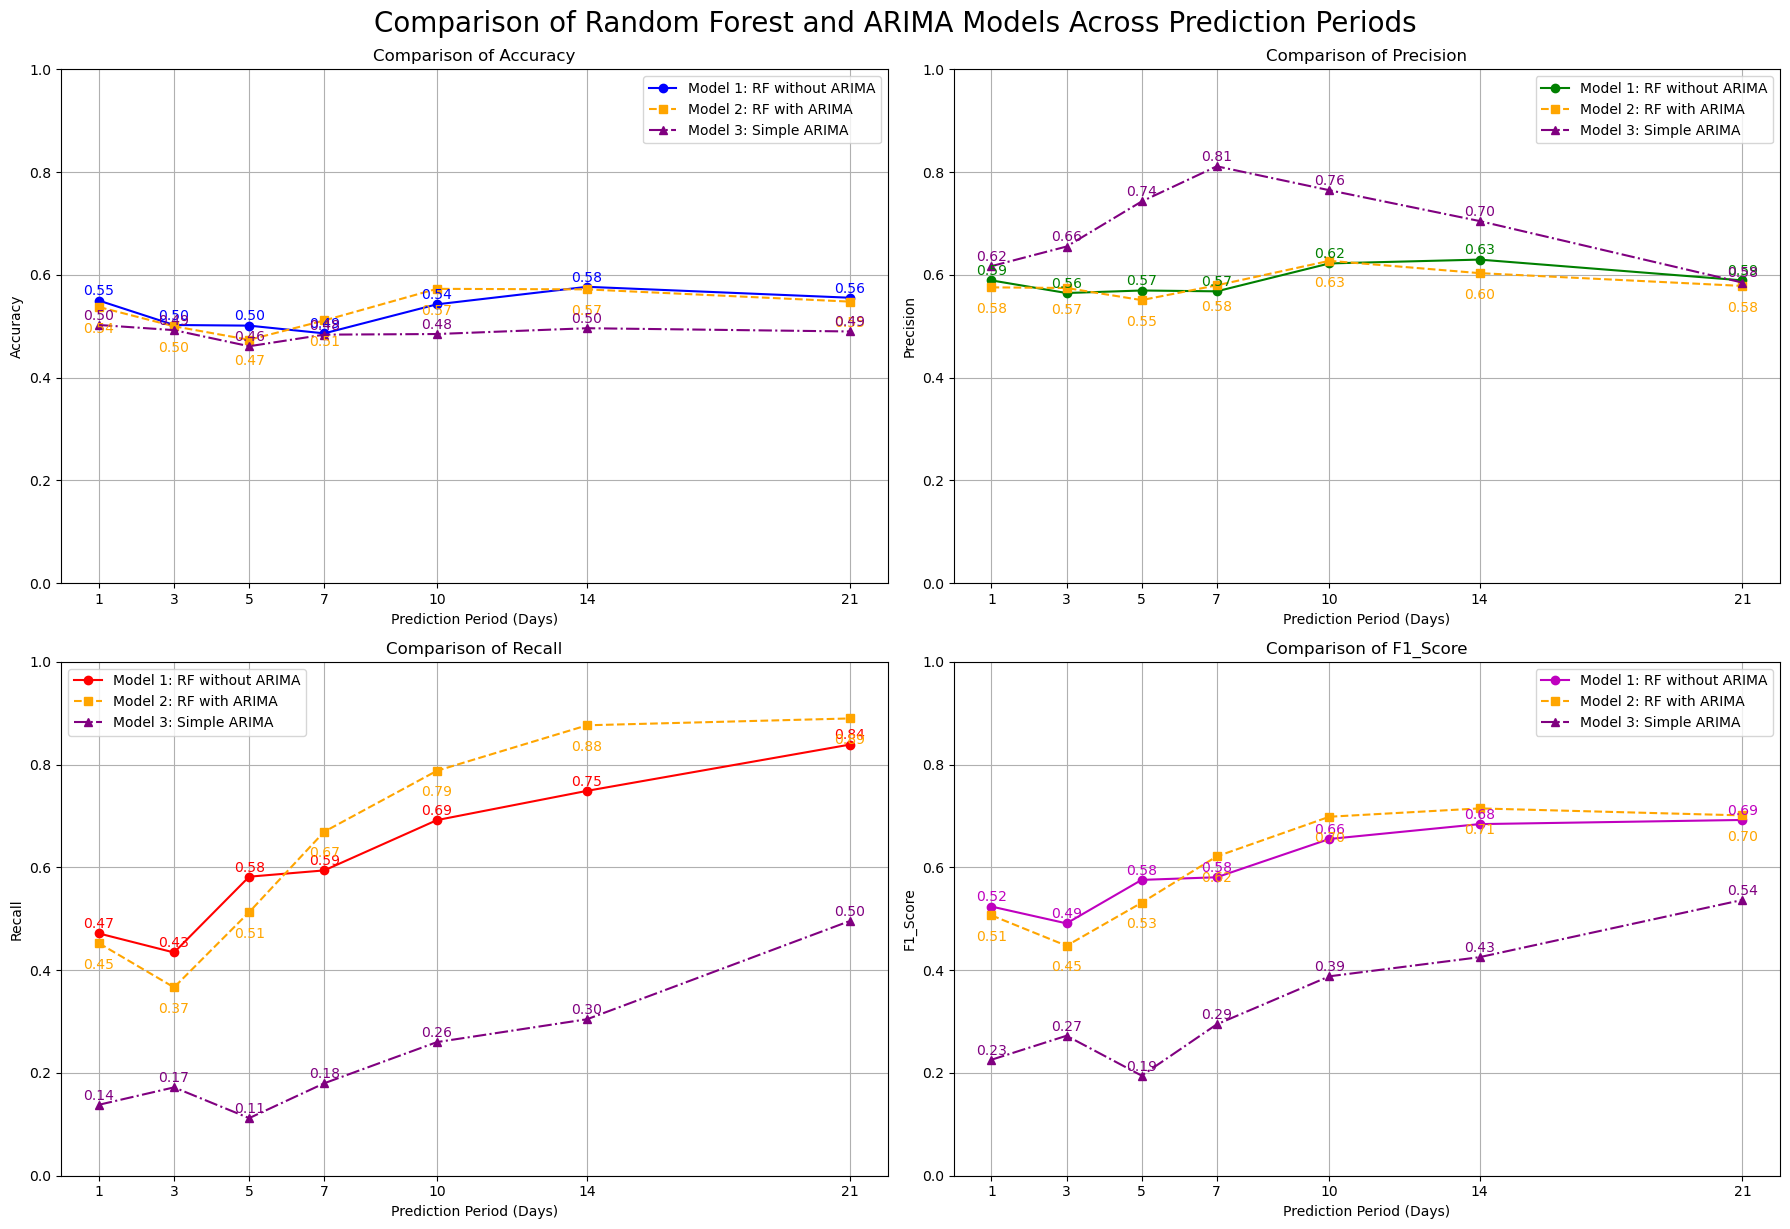

In [58]:
# Import Necessary Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Step 1: Download Stock Data
ticker = 'AAPL'  # Apple Inc.
start_date = '2016-01-01'
end_date = '2024-01-01'

print("Downloading data...")
data = yf.download(ticker, start=start_date, end=end_date)
print("Data downloaded successfully.\n")

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
print("Performing feature engineering...")
# RSI Calculation
delta = data['Smoothed_Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Stochastic Oscillator
lowest_low = data['Low'].rolling(window=14).min()
highest_high = data['High'].rolling(window=14).max()
data['Stochastic'] = ((data['Smoothed_Close'] - lowest_low) / (highest_high - lowest_low)) * 100

# Williams %R
data['Williams_%R'] = ((highest_high - data['Smoothed_Close']) / (highest_high - lowest_low)) * -100

# MACD
ema12 = data['Smoothed_Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26

# Rate of Change (ROC)
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100

# On-Balance Volume (OBV)
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).fillna(0).cumsum()

# Handle NaN values
data.dropna(inplace=True)
print("Feature engineering completed.\n")

# Step 4: Define Prediction Periods
prediction_periods = [1, 3, 5, 7, 10, 14, 21]  # Days ahead to predict

# Initialize dictionaries to store performance metrics for all models
metrics_model1 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

metrics_model2 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

metrics_model3 = {
    'Prediction_Period': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

# Define Base Features (common to both models)
base_features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV']

# Iterate over each prediction period
for d in prediction_periods:
    print(f"Evaluating Prediction Period: {d} days")
    
    # Step 5: Define Target Variable based on 'd' days ahead
    data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])
    data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)
    
    # Drop the last 'd' rows where target is NaN after shifting
    data_d = data[:-d].copy()
    
    # Prepare Features and Labels
    X = data_d[base_features].copy()
    y = data_d['Target'].copy()
    
    # Split data into Train and Test sets (80% Train, 20% Test)
    split_index = int(0.8 * len(X))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    
    # ----------------------------- Model 1: Random Forest without ARIMA -----------------------------
    # Initialize and train Random Forest Classifier
    rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model1.fit(X_train, y_train)
    
    # Make Predictions
    y_pred1 = rf_model1.predict(X_test)
    
    # Evaluate Model 1
    accuracy1 = accuracy_score(y_test, y_pred1)
    report1 = classification_report(y_test, y_pred1, output_dict=True)
    precision1 = report1['1']['precision'] if '1' in report1 else 0
    recall1 = report1['1']['recall'] if '1' in report1 else 0
    f1_1 = report1['1']['f1-score'] if '1' in report1 else 0
    
    # Store Metrics for Model 1
    metrics_model1['Prediction_Period'].append(d)
    metrics_model1['Accuracy'].append(accuracy1)
    metrics_model1['Precision'].append(precision1)
    metrics_model1['Recall'].append(recall1)
    metrics_model1['F1_Score'].append(f1_1)
    
    # ----------------------------- Model 2: Random Forest with ARIMA -----------------------------
    # Initialize ARIMA model on training data's Smoothed_Close
    arima_order = (5, 1, 0)  # You can experiment with different orders
    arima_model = ARIMA(data_d['Smoothed_Close'].iloc[:split_index], order=arima_order)
    arima_fit = arima_model.fit()
    
    # Forecast ARIMA predictions for the test set
    arima_pred = arima_fit.forecast(steps=len(X_test))
    
    # Add ARIMA_Prediction as a new feature
    X_train_arima = X_train.copy()
    X_test_arima = X_test.copy()
    X_train_arima['ARIMA_Prediction'] = arima_fit.predict(start=0, end=len(X_train)-1)
    X_test_arima['ARIMA_Prediction'] = arima_pred.values
    
    # Handle any potential NaN values after ARIMA prediction
    X_train_arima['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
    X_test_arima['ARIMA_Prediction'].fillna(method='ffill', inplace=True)
    
    # Define Final Features for Model 2
    final_features = base_features + ['ARIMA_Prediction']
    
    # Ensure no NaN values
    if X_train_arima[final_features].isnull().sum().sum() > 0 or X_test_arima[final_features].isnull().sum().sum() > 0:
        print("NaN values detected in Model 2 features after ARIMA prediction. Skipping this prediction period.\n")
    else:
        # Initialize and train Random Forest Classifier for Model 2
        rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model2.fit(X_train_arima[final_features], y_train)
        
        # Make Predictions for Model 2
        y_pred2 = rf_model2.predict(X_test_arima[final_features])
        
        # Evaluate Model 2
        accuracy2 = accuracy_score(y_test, y_pred2)
        report2 = classification_report(y_test, y_pred2, output_dict=True)
        precision2 = report2['1']['precision'] if '1' in report2 else 0
        recall2 = report2['1']['recall'] if '1' in report2 else 0
        f1_2 = report2['1']['f1-score'] if '1' in report2 else 0
        
        # Store Metrics for Model 2
        metrics_model2['Prediction_Period'].append(d)
        metrics_model2['Accuracy'].append(accuracy2)
        metrics_model2['Precision'].append(precision2)
        metrics_model2['Recall'].append(recall2)
        metrics_model2['F1_Score'].append(f1_2)
        
        # ----------------------------- Model 3: Simple ARIMA-based Classifier -----------------------------
        # Forecasted Close Price is already obtained as 'arima_pred'
        # Classify based on whether forecasted Close > current Close
        y_pred3 = np.where(arima_pred > data_d['Close'].iloc[split_index:].values, 1, -1)
        
        # Evaluate Model 3
        accuracy3 = accuracy_score(y_test, y_pred3)
        report3 = classification_report(y_test, y_pred3, output_dict=True)
        precision3 = report3['1']['precision'] if '1' in report3 else 0
        recall3 = report3['1']['recall'] if '1' in report3 else 0
        f1_3 = report3['1']['f1-score'] if '1' in report3 else 0
        
        # Store Metrics for Model 3
        metrics_model3['Prediction_Period'].append(d)
        metrics_model3['Accuracy'].append(accuracy3)
        metrics_model3['Precision'].append(precision3)
        metrics_model3['Recall'].append(recall3)
        metrics_model3['F1_Score'].append(f1_3)
        
        print(f"Model 1 (RF without ARIMA) - Accuracy: {accuracy1:.2f}, Precision: {precision1:.2f}, Recall: {recall1:.2f}, F1-Score: {f1_1:.2f}")
        print(f"Model 2 (RF with ARIMA)    - Accuracy: {accuracy2:.2f}, Precision: {precision2:.2f}, Recall: {recall2:.2f}, F1-Score: {f1_2:.2f}")
        print(f"Model 3 (Simple ARIMA)     - Accuracy: {accuracy3:.2f}, Precision: {precision3:.2f}, Recall: {recall3:.2f}, F1-Score: {f1_3:.2f}\n")

# Convert Metrics to DataFrames for Easier Handling
df_metrics_model1 = pd.DataFrame(metrics_model1)
df_metrics_model2 = pd.DataFrame(metrics_model2)
df_metrics_model3 = pd.DataFrame(metrics_model3)

# Merge the DataFrames on Prediction_Period
df_comparison = df_metrics_model1.merge(df_metrics_model2, on='Prediction_Period', how='left', suffixes=('_Model1', '_Model2'))
df_comparison = df_comparison.merge(df_metrics_model3, on='Prediction_Period', how='left', suffixes=('', '_Model3'))

# Rename columns for clarity
df_comparison.rename(columns={
    'Accuracy': 'Accuracy_Model3',
    'Precision': 'Precision_Model3',
    'Recall': 'Recall_Model3',
    'F1_Score': 'F1_Score_Model3'
}, inplace=True)

print("Comparison of Model Performance Across Prediction Periods:")
display(df_comparison)

# Step 6: Visualization of Model Performance Comparison
plt.figure(figsize=(18, 12))

# Define Metrics to Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
colors = {'Accuracy': 'b', 'Precision': 'g', 'Recall': 'r', 'F1_Score': 'm'}

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model1'], marker='o', linestyle='-', color=colors[metric], label='Model 1: RF without ARIMA')
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model2'], marker='s', linestyle='--', color='orange', label='Model 2: RF with ARIMA')
    plt.plot(df_comparison['Prediction_Period'], df_comparison[f'{metric}_Model3'], marker='^', linestyle='-.', color='purple', label='Model 3: Simple ARIMA')
    plt.title(f'Comparison of {metric}')
    plt.xlabel('Prediction Period (Days)')
    plt.ylabel(metric)
    plt.xticks(prediction_periods)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    
    # Annotate each point
    for j, d in enumerate(df_comparison['Prediction_Period']):
        if j < len(df_comparison):
            # Model 1
            plt.text(d, df_comparison[f'{metric}_Model1'][j] + 0.01, f"{df_comparison[f'{metric}_Model1'][j]:.2f}", ha='center', color=colors[metric])
            # Model 2
            plt.text(d, df_comparison[f'{metric}_Model2'][j] - 0.05, f"{df_comparison[f'{metric}_Model2'][j]:.2f}", ha='center', color='orange')
            # Model 3
            plt.text(d, df_comparison[f'{metric}_Model3'][j] + 0.01, f"{df_comparison[f'{metric}_Model3'][j]:.2f}", ha='center', color='purple')

plt.tight_layout()
plt.suptitle('Comparison of Random Forest and ARIMA Models Across Prediction Periods', fontsize=20, y=1.02)
plt.show()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima import auto_arima
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Display plots inline
%matplotlib inline


In [ ]:
# Example: Loading data from a CSV file
# Replace 'your_data.csv' with your actual data source
# Ensure 'Date' column is parsed as datetime and set as index

df = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Ensure the DataFrame has a 'Close' column
if 'Close' not in df.columns:
    raise ValueError("DataFrame must contain a 'Close' column.")

# Extract the 'Close' price series
df_close = df['Close']


In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Download Stock Data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
# Calculate common technical indicators from the smoothed data
data['RSI'] = 100 - (100 / (1 + data['Smoothed_Close'].pct_change().rolling(window=14).mean()))
data['Stochastic'] = (data['Smoothed_Close'] - data['Low'].rolling(window=14).min()) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
data['Williams_%R'] = (data['High'].rolling(window=14).max() - data['Smoothed_Close']) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * -100
data['MACD'] = data['Smoothed_Close'].ewm(span=12, adjust=False).mean() - data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).cumsum()

# Step 4: Apply ARIMA for Initial Predictions
# Fit ARIMA model to capture the linear trend and make future predictions
arima_order = (5, 1, 0)  # ARIMA parameters (p, d, q)
arima_model = ARIMA(data['Smoothed_Close'], order=arima_order)
arima_fit = arima_model.fit()

# Make ARIMA predictions for the test set
data['ARIMA_Prediction'] = arima_fit.predict(start=train_size, end=len(data)-1)

# Handle NaN values
data.dropna(inplace=True)

# Step 5: Define Target Variable
# Calculate target based on price change after 'd' days
d = 5  # Prediction period
data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])

# Convert Target to -1 or 1
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)

# Step 6: Prepare Features and Labels
# Add ARIMA predictions as a feature
features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV', 'ARIMA_Prediction']
X = data[features]
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest Classifier
# Pseudocode implementation of Random Forest (for reference)
# 1. Create an empty array called 'forest'
# 2. For each tree to be built (total B trees):
#    a. Create a bootstrap sample from the training data (Bagging)
#    b. Create a new decision tree (Ti)
#    c. Select a random subset of features for this tree (RandomFeatureSelection)
#    d. Train the decision tree on the selected features
#    e. Add the trained tree to the forest
# 3. Return the forest

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


[*********************100%***********************]  1 of 1 completed

Accuracy: 0.77
              precision    recall  f1-score   support

          -1       0.70      0.93      0.80        15
           1       0.91      0.62      0.74        16

    accuracy                           0.77        31
   macro avg       0.80      0.78      0.77        31
weighted avg       0.81      0.77      0.77        31




/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Download Stock Data
ticker = 'SPY'
data = yf.download(ticker, start='2014-01-01', end='2023-01-01')

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
# Calculate common technical indicators from the smoothed data
data['RSI'] = 100 - (100 / (1 + data['Smoothed_Close'].pct_change().rolling(window=14).mean()))
data['Stochastic'] = (data['Smoothed_Close'] - data['Low'].rolling(window=14).min()) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
data['Williams_%R'] = (data['High'].rolling(window=14).max() - data['Smoothed_Close']) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * -100
data['MACD'] = data['Smoothed_Close'].ewm(span=12, adjust=False).mean() - data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).cumsum()

# Step 4: Apply ARIMA for Long-Term Trend
# Fit ARIMA model to capture the linear trend
arima_order = (5, 1, 0)  # ARIMA parameters (p, d, q)
arima_model = ARIMA(data['Smoothed_Close'], order=arima_order)
arima_fit = arima_model.fit()

# Add ARIMA trend as a feature
data['ARIMA_Trend'] = arima_fit.fittedvalues

# Handle NaN values
data.dropna(inplace=True)

# Step 5: Define Target Variable
# Calculate target based on price change after 'd' days
d = 200  # Prediction period
data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])

# Convert Target to -1 or 1
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)

# Step 6: Prepare Features and Labels
features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV', 'ARIMA_Trend']
X = data[features]
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest Classifier
# Pseudocode implementation of Random Forest (for reference)
# 1. Create an empty array called 'forest'
# 2. For each tree to be built (total B trees):
#    a. Create a bootstrap sample from the training data (Bagging)
#    b. Create a new decision tree (Ti)
#    c. Select a random subset of features for this tree (RandomFeatureSelection)
#    d. Train the decision tree on the selected features
#    e. Add the trained tree to the forest
# 3. Return the forest

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Accuracy: 0.96
              precision    recall  f1-score   support

          -1       0.97      0.90      0.93       136
           1       0.96      0.99      0.97       315

    accuracy                           0.96       451
   macro avg       0.96      0.94      0.95       451
weighted avg       0.96      0.96      0.96       451



In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Download Stock Data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Step 2: Exponential Smoothing for Target Variable
alpha = 0.1  # Smoothing factor
data['Smoothed_Close'] = data['Close'].ewm(alpha=alpha).mean()

# Step 3: Feature Engineering
# Calculate common technical indicators from the smoothed data
data['RSI'] = 100 - (100 / (1 + data['Smoothed_Close'].pct_change().rolling(window=14).mean()))
data['Stochastic'] = (data['Smoothed_Close'] - data['Low'].rolling(window=14).min()) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
data['Williams_%R'] = (data['High'].rolling(window=14).max() - data['Smoothed_Close']) / (
    data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * -100
data['MACD'] = data['Smoothed_Close'].ewm(span=12, adjust=False).mean() - data['Smoothed_Close'].ewm(span=26, adjust=False).mean()
data['ROC'] = data['Smoothed_Close'].pct_change(periods=12) * 100
data['OBV'] = (np.sign(data['Close'].diff()) * data['Volume']).cumsum()

# Step 4: Apply ARIMA for Initial Predictions
# Fit ARIMA model to capture the linear trend and make future predictions
arima_order = (5, 1, 0)  # ARIMA parameters (p, d, q)
arima_model = ARIMA(data['Smoothed_Close'], order=arima_order)
arima_fit = arima_model.fit()

# Make ARIMA predictions for the test set
train_size = int(len(data) * 0.8)
data['ARIMA_Prediction'] = arima_fit.predict(start=train_size, end=len(data)-1)

# Handle NaN values
data.dropna(inplace=True)

# Step 5: Define Target Variable
# Calculate target based on price change after 'd' days
d = 5  # Prediction period
data['Target'] = np.sign(data['Close'].shift(-d) - data['Close'])

# Convert Target to -1 or 1
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0 else -1)

# Step 6: Prepare Features and Labels
# Add ARIMA predictions as a feature
features = ['RSI', 'Stochastic', 'Williams_%R', 'MACD', 'ROC', 'OBV', 'ARIMA_Prediction']
X = data[features]
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest Classifier
# Pseudocode implementation of Random Forest (for reference)
# 1. Create an empty array called 'forest'
# 2. For each tree to be built (total B trees):
#    a. Create a bootstrap sample from the training data (Bagging)
#    b. Create a new decision tree (Ti)
#    c. Select a random subset of features for this tree (RandomFeatureSelection)
#    d. Train the decision tree on the selected features
#    e. Add the trained tree to the forest
# 3. Return the forest

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Step 10: Compare ARIMA vs Random Forest
# ARIMA model accuracy
arima_predictions = np.sign(data['ARIMA_Prediction'] - data['Smoothed_Close'].shift(1))
arima_predictions = arima_predictions.apply(lambda x: 1 if x > 0 else -1)
y_actual = data['Target']

# Align the data indices to ensure a proper comparison
y_actual = y_actual.loc[arima_predictions.index]
arima_accuracy = accuracy_score(y_actual, arima_predictions)
print(f'ARIMA Model Accuracy: {arima_accuracy:.2f}')

# Random Forest model accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {rf_accuracy:.2f}')


[*********************100%***********************]  1 of 1 completed

Accuracy: 0.77
              precision    recall  f1-score   support

          -1       0.70      0.93      0.80        15
           1       0.91      0.62      0.74        16

    accuracy                           0.77        31
   macro avg       0.80      0.78      0.77        31
weighted avg       0.81      0.77      0.77        31

ARIMA Model Accuracy: 0.53
Random Forest Model Accuracy: 0.77



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


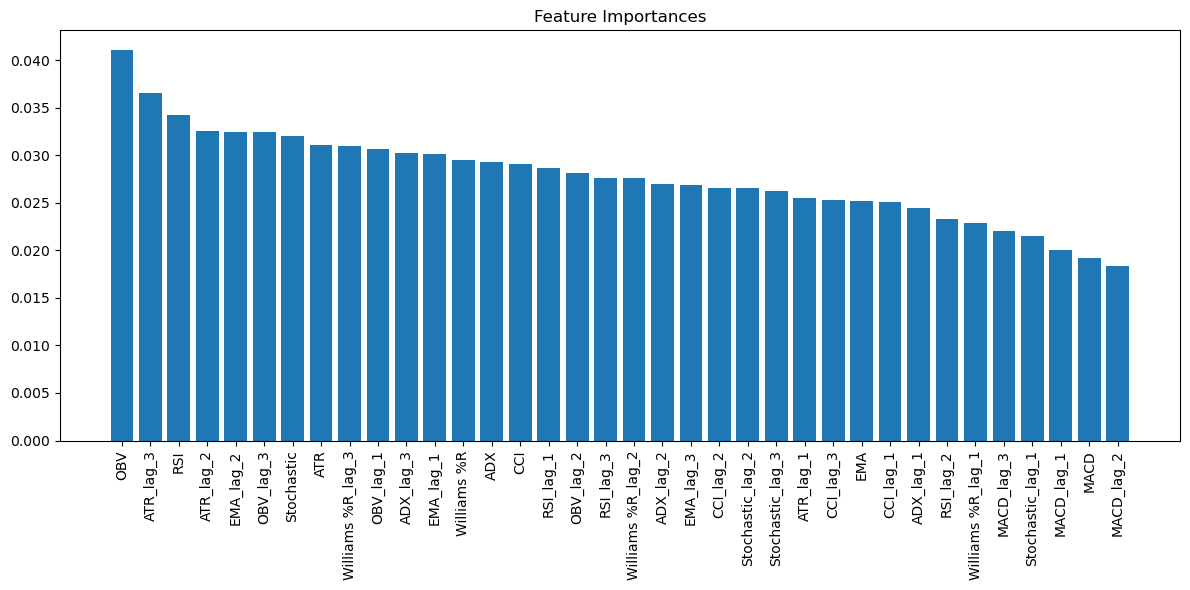

In [4]:
# Feature Importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [feature_columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


In [5]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        43
           1       0.53      0.72      0.61        36

    accuracy                           0.58        79
   macro avg       0.60      0.59      0.58        79
weighted avg       0.60      0.58      0.58        79



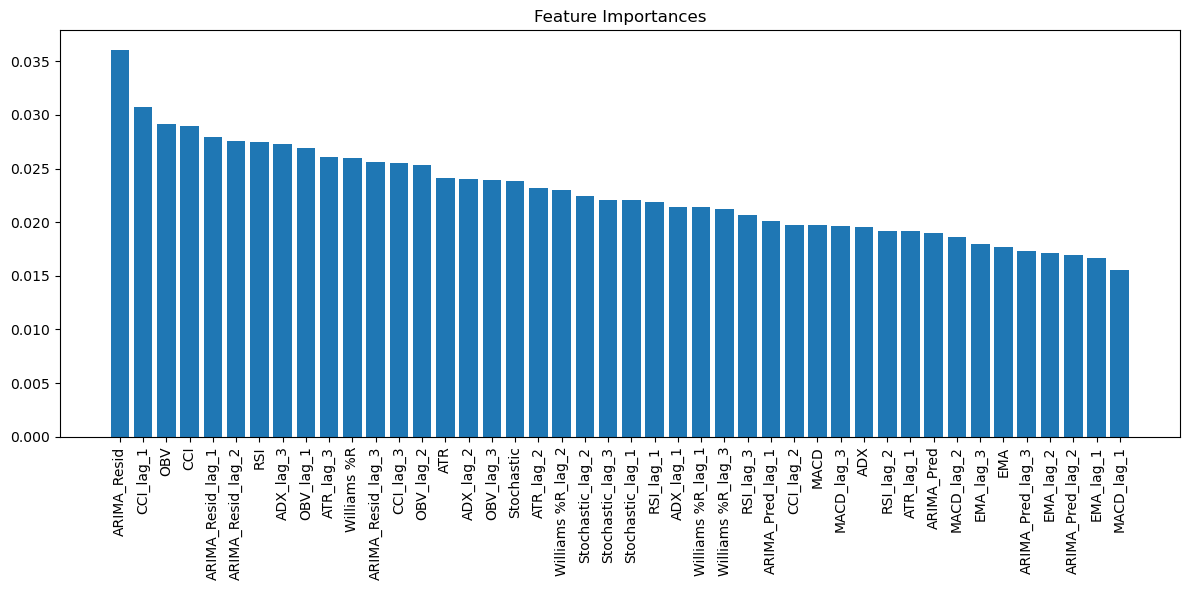

In [7]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [feature_columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


In [35]:
# Arima Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima import auto_arima
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Display plots inline
%matplotlib inline


In [37]:
# Example: Loading data from a CSV file
# Replace 'your_data.csv' with your actual data source
# Ensure 'Date' column is parsed as datetime and set as index

ticker = 'AAPL'
df = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Ensure the DataFrame has a 'Close' column
if 'Close' not in df.columns:
    raise ValueError("DataFrame must contain a 'Close' column.")

# Extract the 'Close' price series
df_close = df['Close']


[*********************100%***********************]  1 of 1 completed


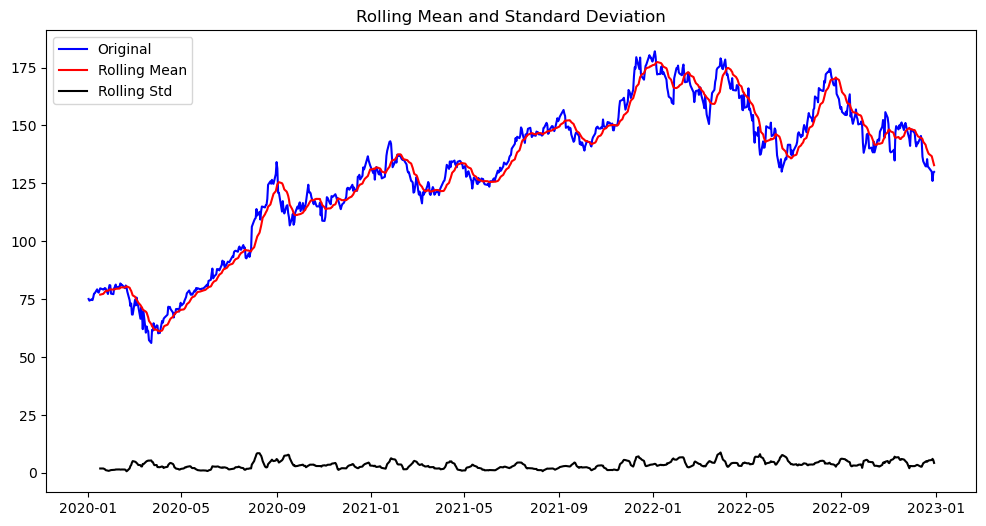

Results of Dickey-Fuller Test:
Test Statistic                  -1.895379
p-value                          0.334238
Lags Used                        1.000000
Number of Observations Used    754.000000
Critical Value (1%)             -3.439053
Critical Value (5%)             -2.865381
Critical Value (10%)            -2.568815
dtype: float64


In [38]:
def test_stationarity(timeseries):
    """
    Function to test the stationarity of a time series using the ADF test
    and plot the rolling mean and standard deviation.
    """
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics:
    plt.figure(figsize=(12,6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    
    print("Results of Dickey-Fuller Test:")
    adft = adfuller(timeseries, autolag='AIC')
    output = pd.Series(adft[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key, value in adft[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)
    
# Perform stationarity test
test_stationarity(df_close)


<Figure size 1600x900 with 0 Axes>

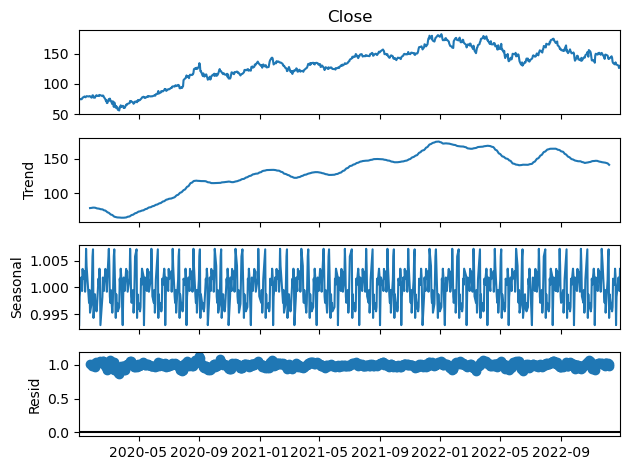

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df_close, model='multiplicative', period=30)  # Adjust 'period' based on data frequency

# Plot the decomposition
plt.figure(figsize=(16,9))
result.plot()
plt.show()


In [40]:
# Define the size of the training set (e.g., 80% for training)
train_size = int(len(df_close) * 0.8)
train_data, test_data = df_close[:train_size], df_close[train_size:]


Building Auto ARIMA model...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2887.831, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2885.852, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2885.825, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2886.840, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2887.797, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2887.819, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2889.640, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2885.037, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2887.045, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2887.036, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2885.047, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2888.824, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.794 seconds
                               SARIMAX Results             

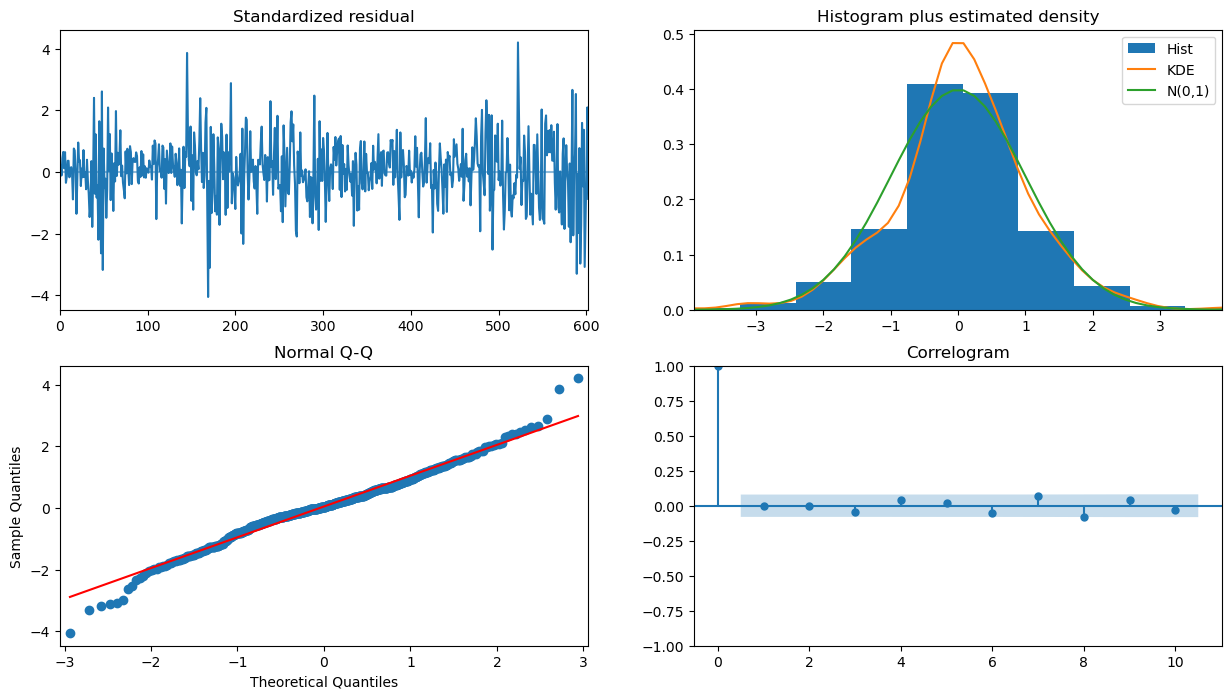

In [41]:
print("Building Auto ARIMA model...")

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                            test='adf',       # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=1,              # frequency of series
                            d=None,           # let model determine 'd'
                            seasonal=False,   # No Seasonality
                            start_P=0, 
                            D=0, 
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

print(model_autoARIMA.summary())

# Plot diagnostics
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


Fitting ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  604
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1440.412
Date:                Mon, 14 Oct 2024   AIC                           2888.824
Time:                        23:41:41   BIC                           2906.431
Sample:                             0   HQIC                          2895.676
                                - 604                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4992      1.228     -0.407      0.684      -2.906       1.907
ma.L1          0.4196      1.226      0.342      0.732      -1.984       2.823
ma.L2         -0.0218      0.

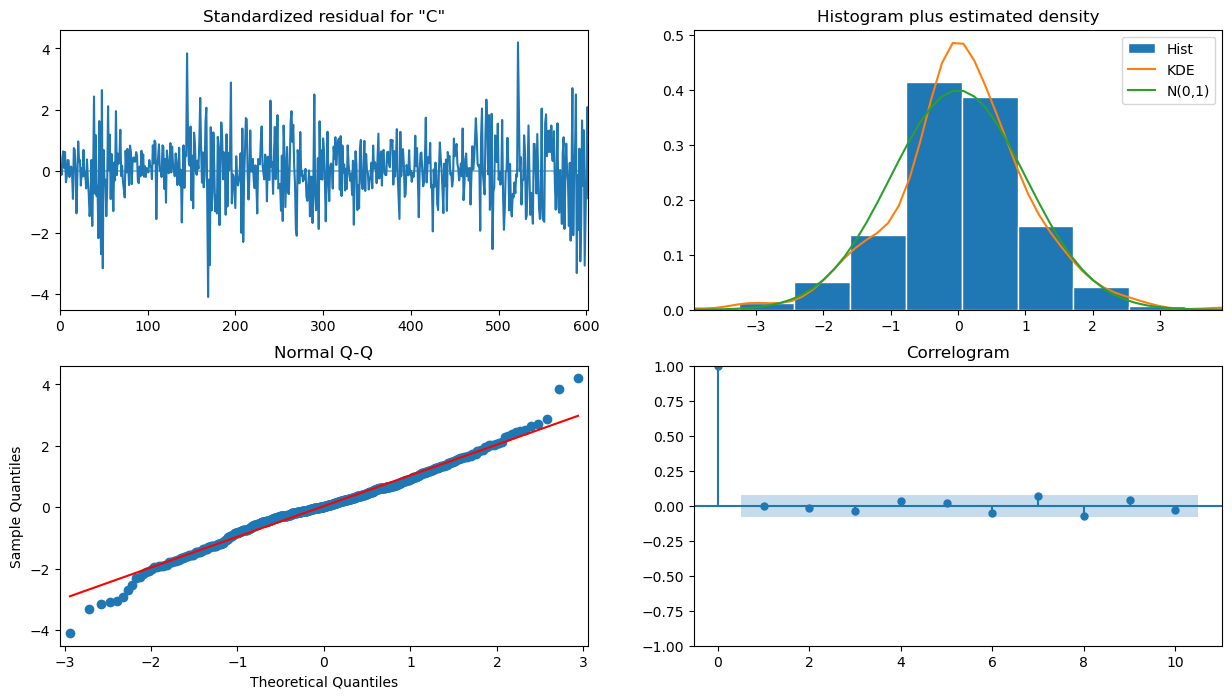

In [42]:
# Assuming Auto ARIMA selected (p=1, d=1, q=2)
print("Fitting ARIMA model...")
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()
print(fitted.summary())

# Plot diagnostics
fitted.plot_diagnostics(figsize=(15,8))
plt.show()


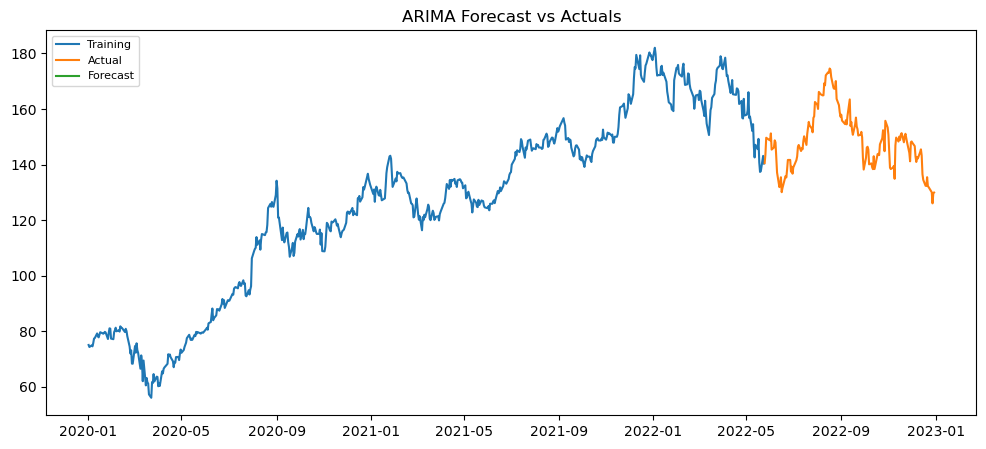

MSE: 175.3302118161182
MAE: 10.304174640972752
RMSE: 13.24123150677905
MAPE: nan


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Forecasting
n_periods = len(test_data)
fc, confint = fitted.get_forecast(steps=n_periods).predicted_mean, fitted.get_forecast(steps=n_periods).conf_int()

# Convert forecast to pandas Series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(confint.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(confint.iloc[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('ARIMA Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Performance Metrics
mse = mean_squared_error(test_data, fc)
mae = mean_absolute_error(test_data, fc)
rmse = math.sqrt(mse)
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data)) * 100

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        66
           1       0.49      0.53      0.51        55

    accuracy                           0.54       121
   macro avg       0.54      0.54      0.54       121
weighted avg       0.54      0.54      0.54       121

Confusion Matrix:
[[36 30]
 [26 29]]


In [20]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)


[*********************100%***********************]  1 of 1 completed
/var/folders/bj/v7yqq2jx251dklc4d7nj2vyc0000gn/T/ipykernel_26582/2544626091.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Accuracy: 55.10%
Classification Report:
              precision    recall  f1-score   support

          -1       0.54      0.64      0.59        72
           0       0.00      0.00      0.00         1
           1       0.56      0.47      0.51        74

    accuracy                           0.55       147
   macro avg       0.37      0.37      0.37       147
weighted avg       0.55      0.55      0.55       147



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


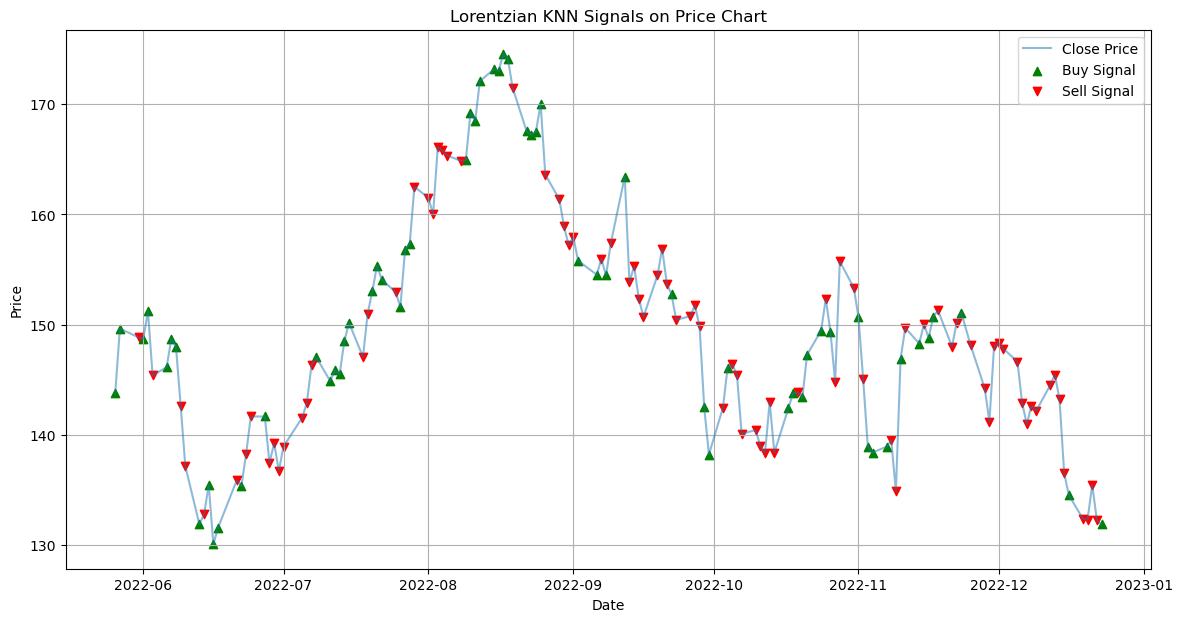

In [29]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import ta  # Technical Analysis library
import matplotlib.pyplot as plt

# Download historical price data
ticker = 'AAPL'  # You can change this to any stock symbol
data = yf.download(ticker, start='2020-01-01', end='2023-01-01', interval='1d')

# Calculate technical indicators
# RSI
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()

# WaveTrend Oscillator (WT)
def calculate_wavetrend(df, n1=10, n2=11):
    hlc3 = (df['High'] + df['Low'] + df['Close']) / 3
    esa = hlc3.ewm(span=n1, adjust=False).mean()
    de = (hlc3 - esa).ewm(span=n2, adjust=False).mean().abs()
    ci = (hlc3 - esa) / (0.015 * de)
    wt = ci.ewm(span=4, adjust=False).mean()
    return wt

data['WT'] = calculate_wavetrend(data)

# CCI
data['CCI'] = ta.trend.CCIIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=20).cci()

# ADX
data['ADX'] = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Close'], window=14).adx()

# Drop rows with NaN values
data.dropna(inplace=True)

# Create the target variable (future price movement over the next 4 bars)
data['Price_Change'] = data['Close'].shift(-4) - data['Close']
data['Target'] = data['Price_Change'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Drop the last 4 rows with NaN values due to shifting
data.dropna(inplace=True)

# Define the features and target
features = ['RSI', 'WT', 'CCI', 'ADX']
X = data[features]
y = data['Target']

# Handle any potential NaN values
X.dropna(inplace=True)
y = y.loc[X.index]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X_scaled) * split_ratio)

X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Define the Lorentzian distance function
def lorentzian_distance(x, y):
    return np.sum(np.log(1 + np.abs(x - y)))

# Custom KNN Classifier using Lorentzian distance
class LorentzianKNN(KNeighborsClassifier):
    def __init__(self, n_neighbors=8):
        super().__init__(
            n_neighbors=n_neighbors,
            metric=lorentzian_distance,
            algorithm='brute'  # Use brute-force search
        )

# Initialize the Lorentzian KNN classifier
knn = LorentzianKNN(n_neighbors=8)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Add predictions to the DataFrame
data_test = data.iloc[split_index:].copy()
data_test['Prediction'] = y_pred
data_test['Signal'] = data_test['Prediction'].replace({-1: 'Sell', 0: 'Hold', 1: 'Buy'})

# Plot the signals on the price chart
plt.figure(figsize=(14, 7))
plt.plot(data_test['Close'], label='Close Price', alpha=0.5)

# Plot Buy Signals
buy_signals = data_test[data_test['Signal'] == 'Buy']
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)

# Plot Sell Signals
sell_signals = data_test[data_test['Signal'] == 'Sell']
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Lorentzian KNN Signals on Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


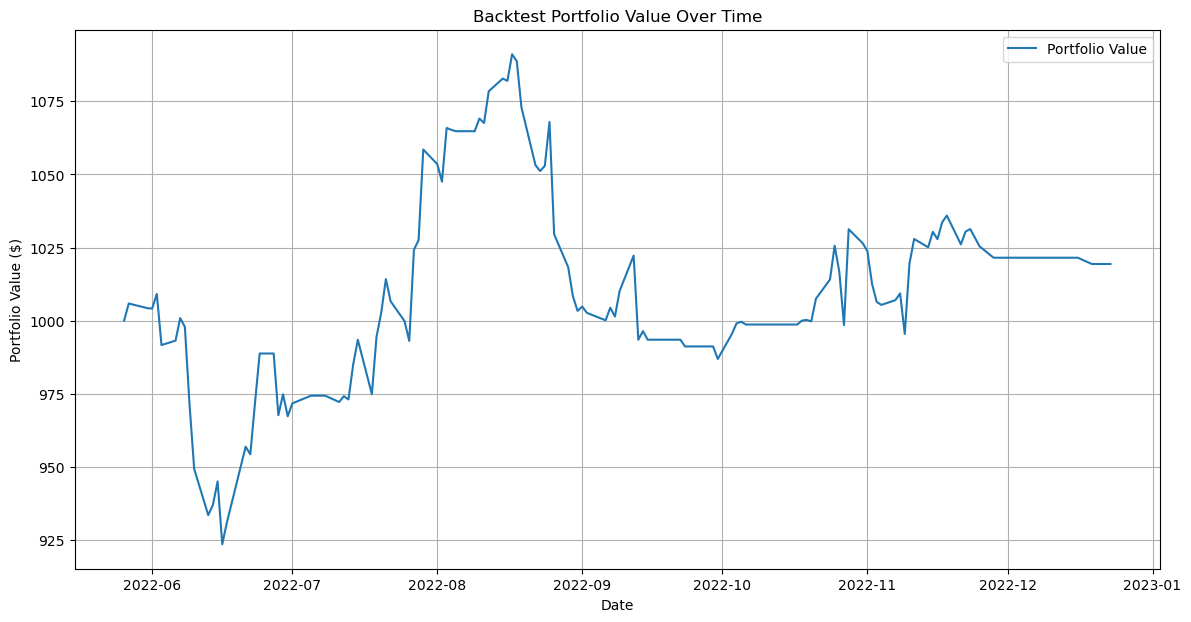

Initial Capital: $1000
Final Portfolio Value: $1019.38
Total Return: 1.94%


In [30]:
# Initialize variables for backtesting
initial_capital = 1000
capital = initial_capital
position = 0  # Number of shares held
portfolio_value = []

# Iterate over the test data to simulate trading
for index, row in data_test.iterrows():
    signal = row['Signal']
    close_price = row['Close']
    
    if signal == 'Buy' and capital >= close_price:
        # Buy one share
        position += 1
        capital -= close_price
    elif signal == 'Sell' and position > 0:
        # Sell one share
        position -= 1
        capital += close_price
    
    # Calculate the current portfolio value
    current_value = capital + position * close_price
    portfolio_value.append(current_value)

# Add portfolio value to the DataFrame
data_test['Portfolio_Value'] = portfolio_value

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(data_test.index, data_test['Portfolio_Value'], label='Portfolio Value')
plt.title('Backtest Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid()
plt.show()

# Print the final portfolio value
final_value = data_test['Portfolio_Value'].iloc[-1]
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {((final_value - initial_capital) / initial_capital) * 100:.2f}%")